In [5]:
### Computed a covariance matrix and the Eigen vector basis using the vectorized representation  for a given set of  images of a single digit.

### Project each image onto this PCA space using i) all Eigen vectors ii) Selected Eigen vectors with different values of energy thresholds (computed using the top k Eigen values) and Reconstructed the original images using the projected data obtained in the cases above 

### Added 20% noise to the images, and performed the same experiment as above. 

# Visualizing the numbers

total number of sevens in the data  6265
Image plots for all the eigen vactors


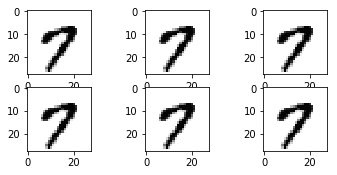

Image plots for selected  'z' eigen vactors 


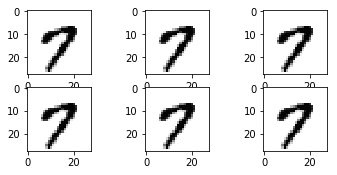

Image plots with noise before using PCA


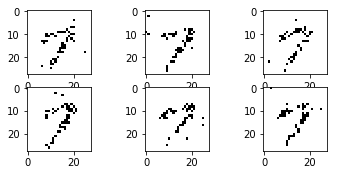

Image plots with noise  selected eigen vactors 


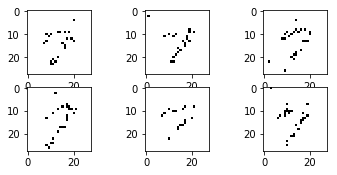

In [3]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from numpy import linalg as LA
from scipy.linalg import eigh
import math

def training_images():
    with gzip.open('train-images-idx3-ubyte.gz', 'r') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        image_count = int.from_bytes(f.read(4), 'big')
        row_count = int.from_bytes(f.read(4), 'big')
        column_count = int.from_bytes(f.read(4), 'big')
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8)\
            .reshape((image_count, row_count, column_count))
        return images


def training_labels():
    with gzip.open('train-labels-idx1-ubyte.gz', 'r') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        label_count = int.from_bytes(f.read(4), 'big')
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels
    
def plotting_data(data):
    for i in range(6):
        pixels = data[i][:]
        pixels = 255-np.array(pixels, dtype='uint8')
        pixels = pixels.reshape((28,28))
        plt.subplot(331 + i)
        plt.imshow(pixels, cmap='gray')
    plt.show()

def Eigen_Vectors(cov):   
    vals, vectrs = LA.eig(cov)
    return vals, np.array(vectrs)
    
pl = list(training_images())
pi = list(training_labels())

def Load_Digit_Seven():
    sevens = []
    for val in pi:
        if val == 7:
            sevens.append(pl[pi.index(val)])
    sevens = np.array(sevens)   
    print("total number of sevens in the data ",len(sevens))
    main_data = []
    for mat in sevens:
        main_data.append(mat.flatten())
    df = pd.DataFrame(main_data[:200])
    return main_data

df = Load_Digit_Seven()
print("Image plots for all the eigen vactors")
plotting_data(df)

def sorted_eig(matrix_cov):   
    lambdas, vs = LA.eig(matrix_cov)
    return lambdas, np.array(vs)
    
def pca(df,z):
    mean_data = np.mean(df,axis = 0)
    sample_vector = np.array(df)-mean_data
    covar_matrix = np.matmul(sample_vector.T , sample_vector)
    values, vectors = sorted_eig(covar_matrix)
    vectors = vectors[:,:z]
    transfer = np.matmul(sample_vector,vectors)
    projection = np.matmul(transfer,vectors.T) 
    projected = projection + mean_data
    plotting_data(projected)

print("Image plots for selected  'z' eigen vactors ")

z= 21
pca(df,z)

import skimage.util as sk
sk.random_noise(df[0], mode='gaussian', seed=None, clip=True)
data_to_noise = df.copy()
noise_induced = [sk.random_noise(data_to_noise[i], mode='gaussian', seed=None, clip=True, mean = 0, var = 0.15) for i in range(6265)]
print("Image plots with noise before using PCA")
plotting_data(noise_induced)
print("Image plots with noise  selected eigen vactors ")
pca(noise_induced,784)


# PCA based renoising the data

Image plots for before using PCA


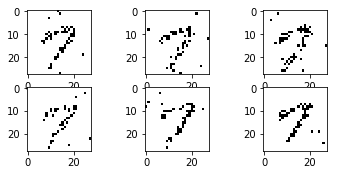

Image plots for selected eigen vactors 


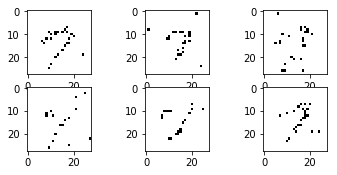

In [4]:
import skimage.util as sk
sk.random_noise(df[0], mode='gaussian', seed=None, clip=True)
data_to_noise = df.copy()
noise_induced = [sk.random_noise(data_to_noise[i], mode='gaussian', seed=None, clip=True, mean = 0, var = 0.15) for i in range(6265)]
print("Image plots for before using PCA")
plotting_data(noise_induced)
print("Image plots for selected eigen vactors ")
pca(noise_induced,784)
